In [1]:
%load_ext sql

In [2]:
import sqlite3

In [3]:
# Creates new database if doesn't exist
con = sqlite3.connect('socioeconomic.db')
cur = con.cursor()

In [4]:
%%sql
sqlite:///socioeconomic.db

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv('jcxq-k9xf.csv')

In [9]:
df.to_sql('chicago_socioeconomic_data', con, if_exists = 'replace', index = False, method = 'multi')

In [10]:
%%sql
select * from chicago_socioeconomic_data limit 5; 

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [12]:
%%sql
select count(*) from chicago_socioeconomic_data ; 

 * sqlite:///socioeconomic.db
Done.


count(*)
78


In [13]:
df.shape

(78, 9)

In [18]:
%%sql
select community_area_name from chicago_socioeconomic_data
where hardship_index =  (select max(hardship_index) from chicago_socioeconomic_data);

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
income_vs_hardship = %sql select per_capita_income_, hardship_index from chicago_socioeconomic_data ;

 * sqlite:///socioeconomic.db
Done.


In [23]:
type(income_vs_hardship)

sql.run.ResultSet

In [24]:
df = income_vs_hardship.DataFrame()

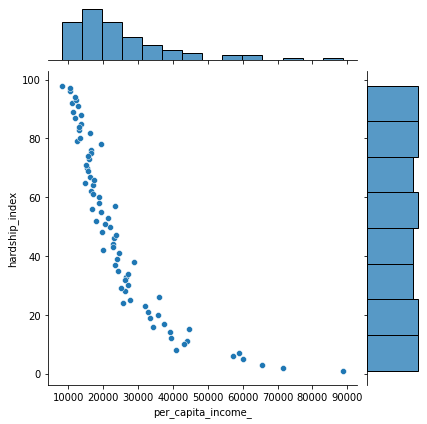

In [25]:
plot = sns.jointplot(x = 'per_capita_income_', y = 'hardship_index' , data = df)

Text(0, 0.5, 'Hardship')

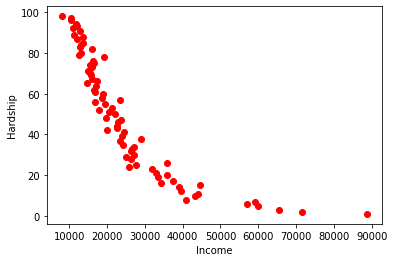

In [27]:
plt.scatter(x = 'per_capita_income_', y = 'hardship_index' , data = df, c = 'r')
plt.xlabel('Income')
plt.ylabel('Hardship')

In [28]:
cur.close()

In [29]:
con.close()

### Thank You